In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.exceptions import AxisError
import pandas as pd
from scipy import stats

from sqlalchemy import create_engine, Table, Column, Integer, String, MetaData, Integer, String, insert, select

engine = create_engine("sqlite+pysqlite:///GPSdata1.db", echo=False)

metadata_obj = MetaData()

players_table = Table("players", metadata_obj, autoload_with=engine)
sessions_data_table = Table("sessions_data", metadata_obj, autoload_with=engine)

In [9]:
from figure_generators import generate_RPs_position_row, generate_RPs_team_row, generate_RPs_team_position_row

In [10]:
def get_measure_df(measure):

    measures = sessions_data_table.columns
    measure_column = measures[measure]

    with engine.connect() as conn:
        stmt = (
            select(players_table.c.team, players_table.c.position, measure_column)
            .join(sessions_data_table, players_table.c.id == sessions_data_table.c.player_id)
            .order_by(players_table.c.team)
        )

        data = conn.execute(stmt).mappings().all()

    return pd.DataFrame(data)

In [11]:
measures = ['HSR/min', 'Dis/min', 'SD/min', 'Accels + Decels /min', 'PlayerLoad']
pallete = "dark"

Ridge plots for each measure by position, with a larger bandwidth

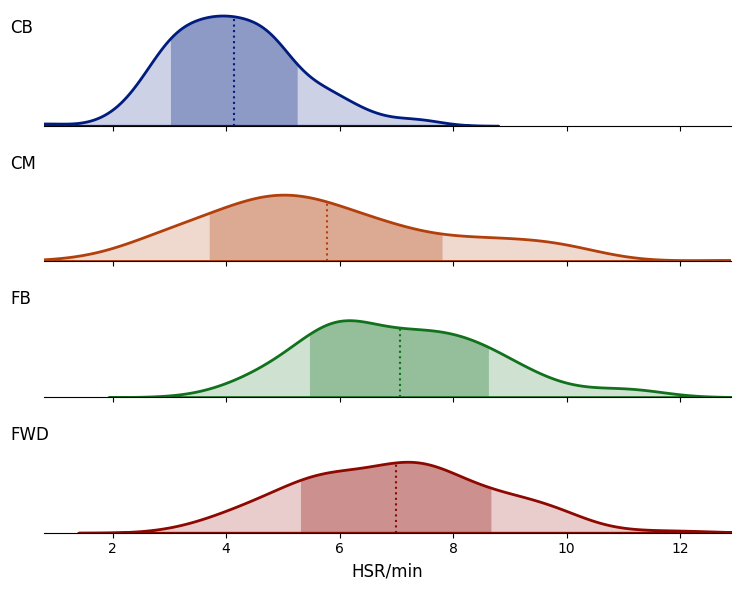

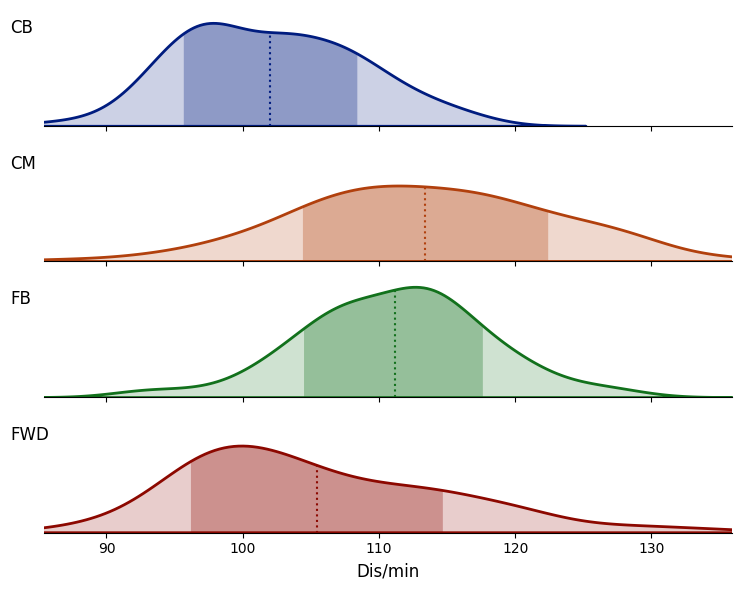

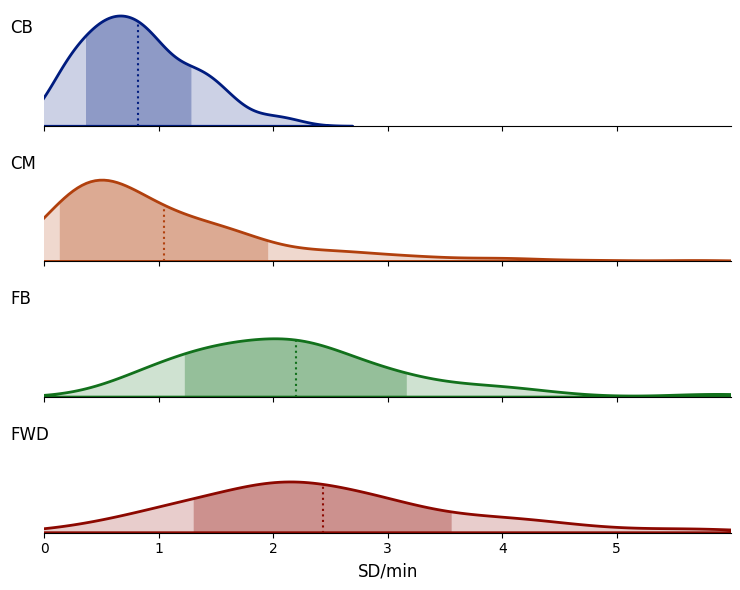

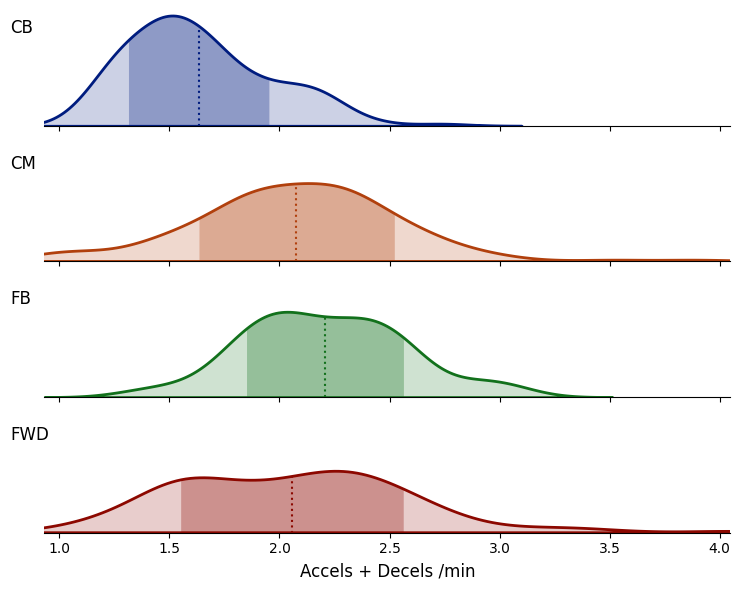

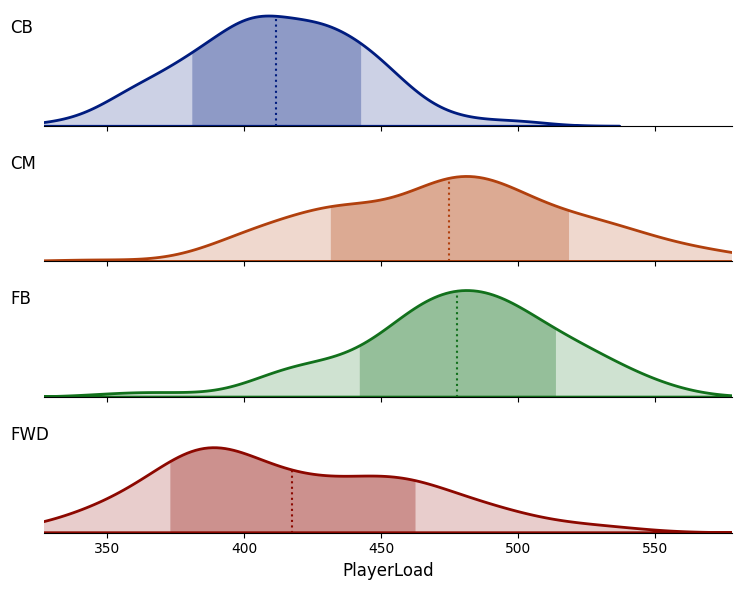

In [12]:
for measure in measures:
    df = get_measure_df(measure)
    generate_RPs_position_row(df=df, measure=measure, pallette=pallete, show_stdv=True, bw_adjust=1, height=1.5)

Ridge plots for each measure by team

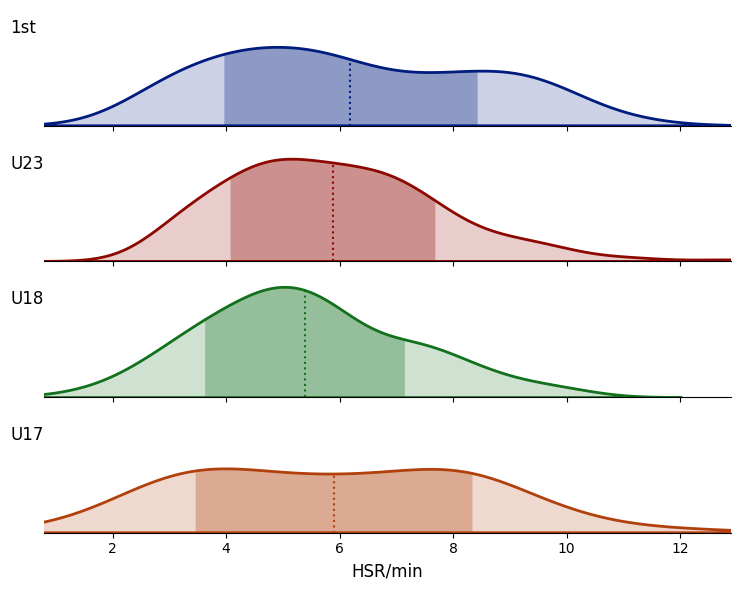

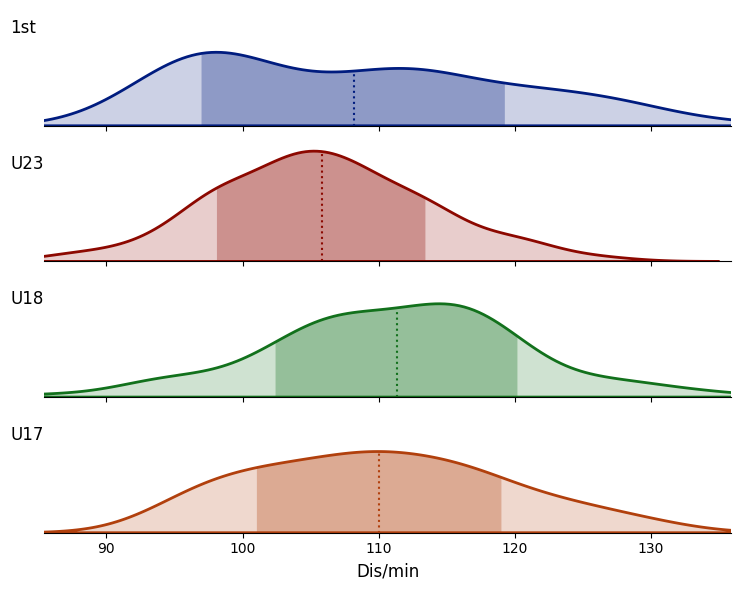

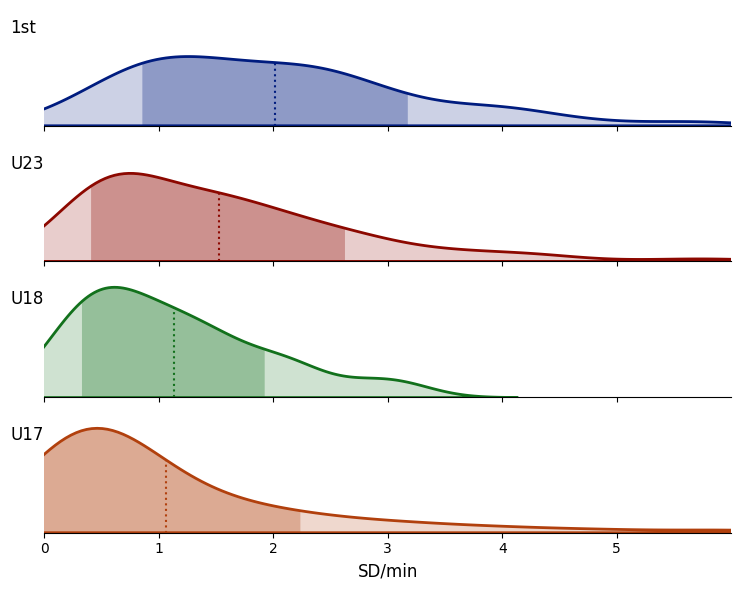

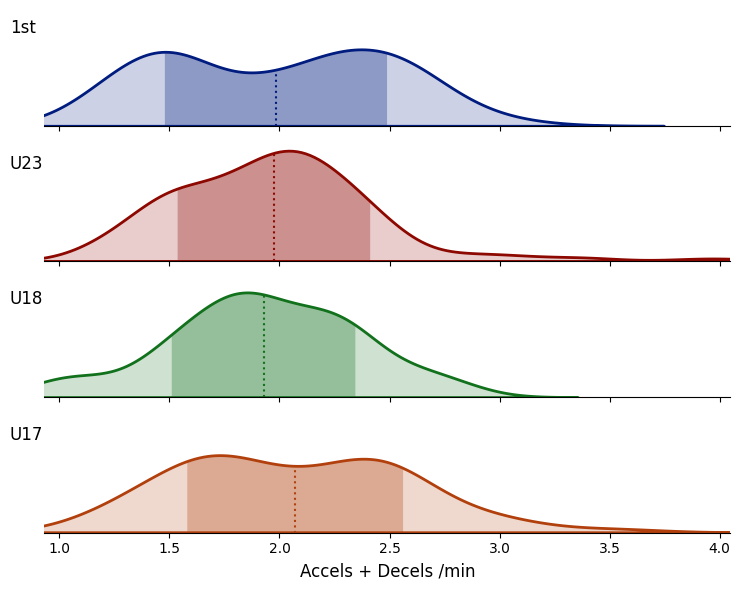

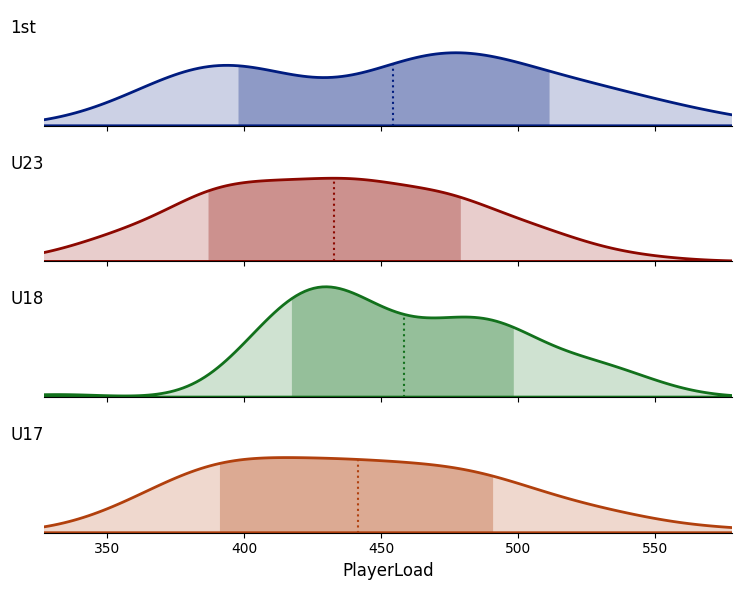

In [13]:
for measure in measures:
    df = get_measure_df(measure)
    generate_RPs_team_row(df=df, measure=measure, pallette=pallete, show_stdv=True, bw_adjust=1, height=1.5)

Ridgeline plots for team and position

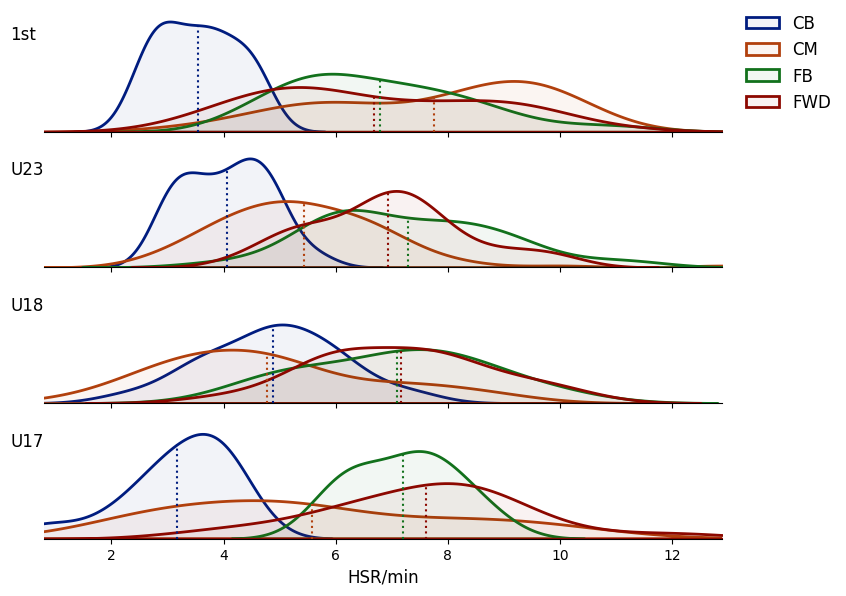

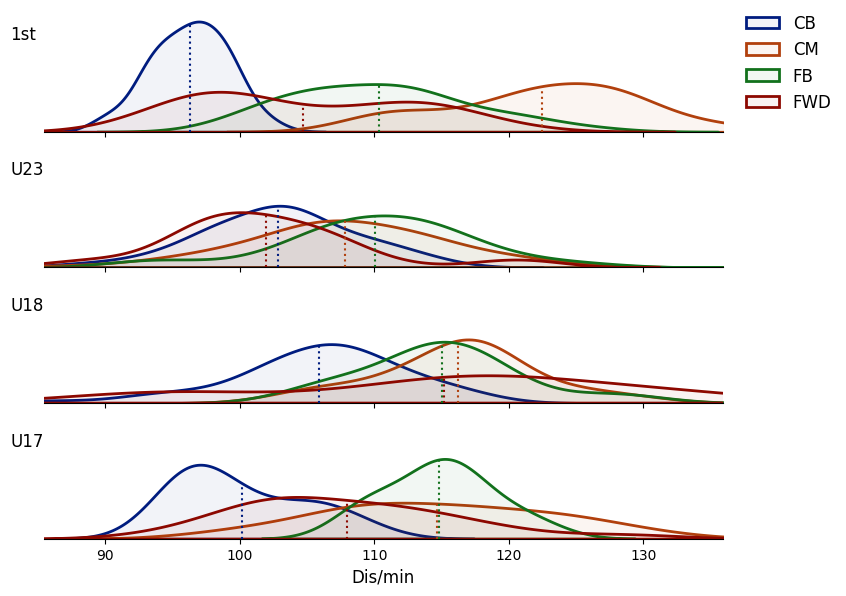

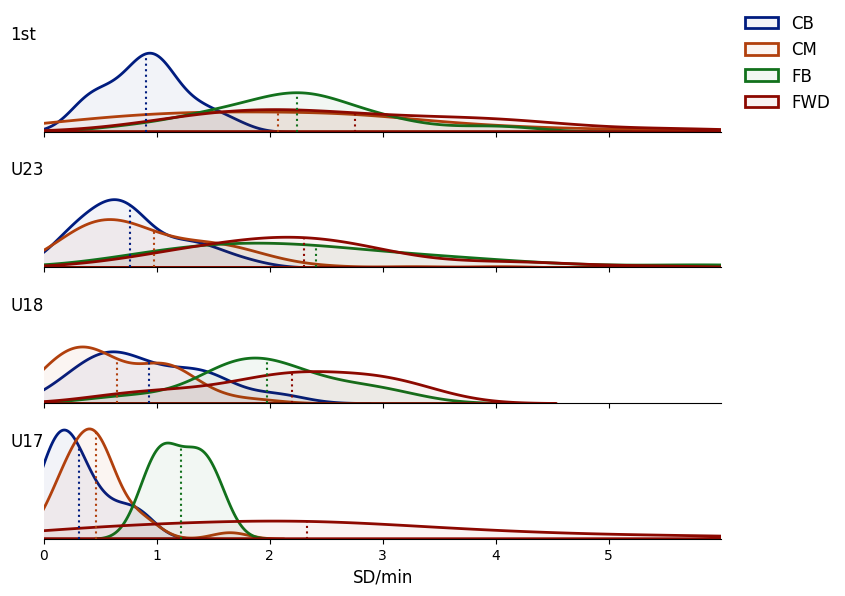

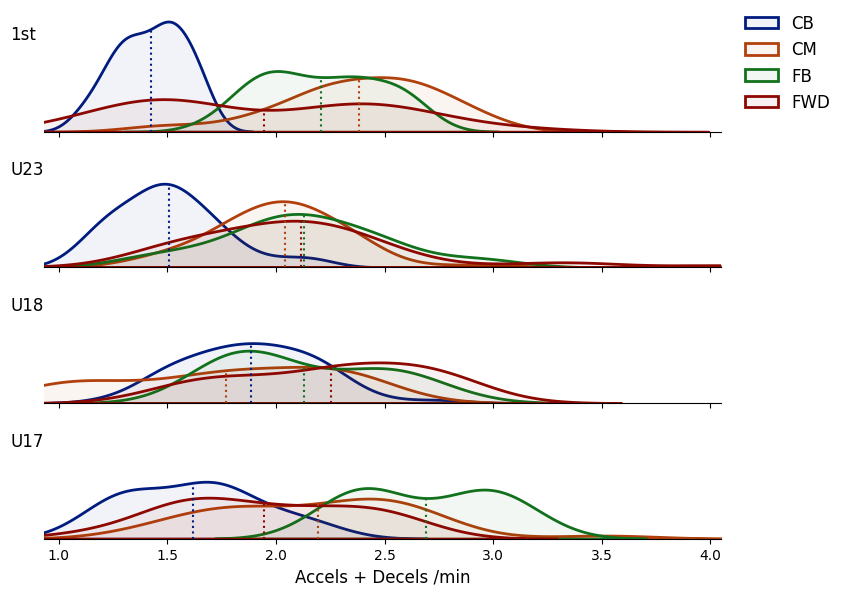

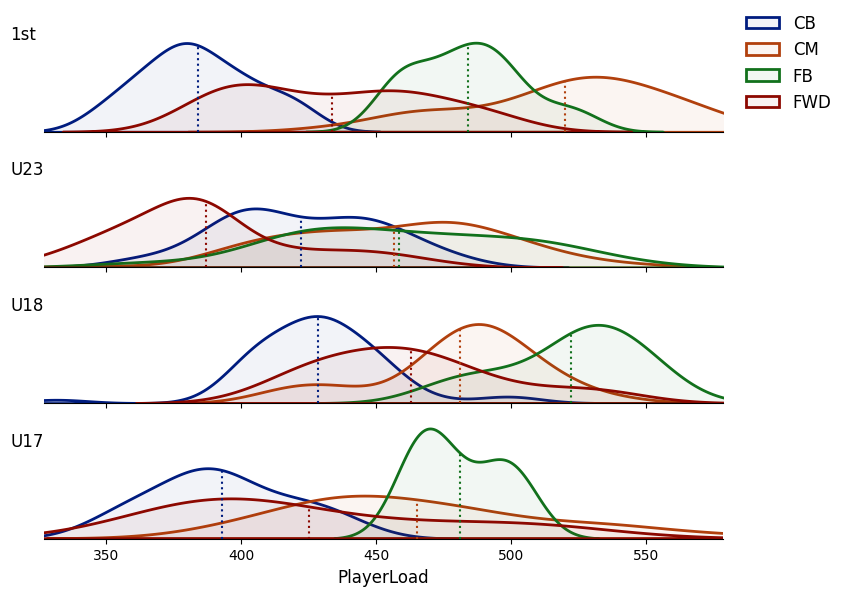

In [14]:
for measure in measures:
    df = get_measure_df(measure)
    generate_RPs_team_position_row(df=df, measure=measure, pallette=pallete, bw_adjust=1, height=1.5)